## Cleaning Data (API Called) 6950 data points)

In [2]:
#import visualization tools for subsequent analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('movieDB_API_movies.csv')
df.head()

,Unnamed: 0,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214
1,1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045
2,2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486
3,3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751
4,4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163


In [3]:
df.info() # clean set, 6950 no missing data apparently

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 12 columns):
Unnamed: 0      6950 non-null int64
budget          6950 non-null int64
genres          6950 non-null object
id              6950 non-null int64
imdb_id         6949 non-null object
popularity      6950 non-null float64
release_date    6950 non-null object
revenue         6950 non-null int64
runtime         6937 non-null float64
title           6950 non-null object
vote_average    6950 non-null float64
vote_count      6950 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 651.6+ KB


## Are there columns we can drop right away?

In [4]:
df = df.drop(columns='Unnamed: 0') # drop useless column identical-to-index column

## Calculating Gross Profit (Revenue - Budget)

In [5]:
df['gross_profit'] = df[(df['revenue'] != 0) & (df['budget'] != 0)]['revenue'] -df[(df['revenue'] != 0) & (df['budget'] != 0)]['budget']

In [6]:
pd.DataFrame(df).to_csv('movieDB_API_movies_w_gross_profits.csv')

## Do we have 0 values where there shouldn't be?

In [7]:
df[df['popularity'] == 0] # clear, all data has some popularity
df[df['revenue'] == 0] # 2021 empty revenue 
df[(df['revenue'] == 0) & (df['budget'] == 0)] # 1417 no budget or revenue

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
17,0,"['Adventure', 'Comedy']",40096,tt0271383,9.056,2000-09-15,0,104.0,A Dog's Will,8.4,568,NaN
26,0,"['Comedy', 'Drama']",579245,tt8655470,24.981,2019-10-23,0,114.0,The Specials,8.4,216,NaN
34,0,"['Drama', 'Mystery']",432517,tt3845892,8.352,2017-01-15,0,90.0,Sherlock: The Final Problem,8.4,764,NaN
38,0,['Drama'],18148,tt0046438,10.696,1953-11-03,0,134.0,Tokyo Story,8.4,431,NaN
41,0,"['Animation', 'Family', 'Adventure', 'Comedy']",508965,tt4729430,26.087,2019-11-08,0,96.0,Klaus,8.3,1401,NaN
42,0,"['Science Fiction', 'Adventure']",313106,tt2779318,9.891,2013-11-23,0,77.0,Doctor Who: The Day of the Doctor,8.4,545,NaN
44,0,"['Drama', 'Mystery', 'Crime']",452522,tt0278784,8.237,1989-12-31,0,112.0,Twin Peaks,8.3,348,NaN
46,0,"['Action', 'Drama', 'History']",14537,tt0056058,10.650,1962-09-15,0,135.0,Harakiri,8.3,314,NaN
51,0,['Drama'],797,tt0060827,11.320,1966-10-18,0,85.0,Persona,8.3,911,NaN
52,0,"['Crime', 'Drama', 'Mystery', 'Thriller']",12493,tt0057565,11.203,1963-03-01,0,142.0,High and Low,8.3,268,NaN


In [8]:
df[(df['revenue'] != 0) & (df['budget'] != 0)] # 4273 full data points

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,8.680000e+07
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3.341469e+06
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,2.390664e+08
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,1.896920e+08
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,2.993656e+08
5,13000000,"['Drama', 'Crime']",240,tt0071562,22.280,1974-12-20,102600000,202.0,The Godfather: Part II,8.5,6754,8.960000e+07
7,19000000,"['Animation', 'Family', 'Fantasy']",129,tt0245429,47.471,2001-07-20,274925095,125.0,Spirited Away,8.5,8562,2.559251e+08
8,60000000,"['Fantasy', 'Drama', 'Crime']",497,tt0120689,20.562,1999-12-10,286801374,189.0,The Green Mile,8.5,9500,2.268014e+08
9,8000000,"['Thriller', 'Crime']",680,tt0110912,28.749,1994-09-10,214179088,154.0,Pulp Fiction,8.5,17548,2.061791e+08
10,20000000,"['Comedy', 'Drama']",637,tt0118799,19.398,1997-12-20,229400000,116.0,Life Is Beautiful,8.5,8243,2.094000e+08


## What are the genres?

In [9]:
# What genres do we have?
## 1625 unique combinations of genres

# Top 3 Genres?
## Comedy 552/1625 or 34%
## Drama 419/1625 or 26%
## (Drama + Romance) 195/1625 or 12%
1
#showing first ten genres
df['genres'].value_counts()[0:10] #we should keep the combinations... They're important

['Comedy']                        552
['Drama']                         419
['Drama', 'Romance']              195
['Comedy', 'Romance']             176
['Comedy', 'Drama']               173
['Horror', 'Thriller']            140
['Comedy', 'Drama', 'Romance']    124
['Horror']                        121
['Drama', 'Thriller']              80
['Drama', 'Comedy']                76
Name: genres, dtype: int64

## What's the distribution of movie popularity?

In [10]:
df.head()

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0


In [11]:
df[df['popularity'] < 1400]

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,8.680000e+07
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3.341469e+06
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,2.390664e+08
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,1.896920e+08
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,2.993656e+08
5,13000000,"['Drama', 'Crime']",240,tt0071562,22.280,1974-12-20,102600000,202.0,The Godfather: Part II,8.5,6754,8.960000e+07
6,0,"['Romance', 'Animation', 'Drama']",372058,tt5311514,29.292,2016-08-26,357986087,106.0,Your Name.,8.5,5018,NaN
7,19000000,"['Animation', 'Family', 'Fantasy']",129,tt0245429,47.471,2001-07-20,274925095,125.0,Spirited Away,8.5,8562,2.559251e+08
8,60000000,"['Fantasy', 'Drama', 'Crime']",497,tt0120689,20.562,1999-12-10,286801374,189.0,The Green Mile,8.5,9500,2.268014e+08
9,8000000,"['Thriller', 'Crime']",680,tt0110912,28.749,1994-09-10,214179088,154.0,Pulp Fiction,8.5,17548,2.061791e+08


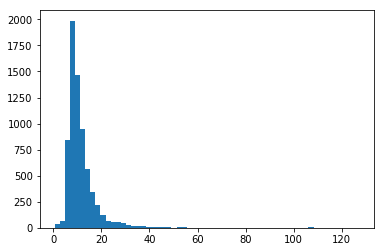

In [12]:
plt.hist(df[df['popularity'] < 140]['popularity'], bins=60);
plt.show()

In [13]:
# x = range(0, df['title'].count()) # plotting movie popularity
# y = df['popularity']
# fig, ax = plt.subplots(figsize=(10,5))
# sns.distplot(x,y);

# print(x.describe())

## What's the range of average vote ratings?

/Users/chrischung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    6950.000000
mean        6.537755
std         0.853988
min         2.600000
25%         6.000000
50%         6.500000
75%         7.200000
max         8.800000
Name: vote_average, dtype: float64

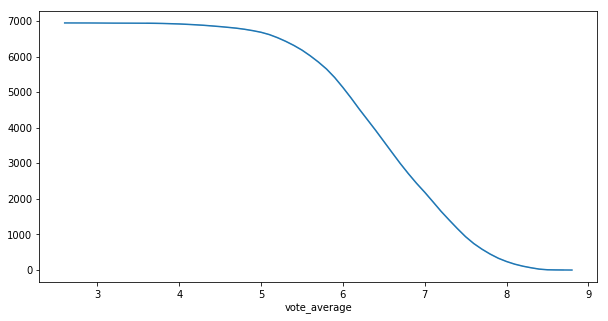

In [14]:
y = range(0, df['title'].count()) # plotting movie vote_average
x = df['vote_average']
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x,y);

x.describe()

In [15]:
df[df['vote_average'] < 7] # the majority of movies have rating under 7

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
2314,140000000,"['Action', 'Adventure', 'Science Fiction', 'Co...",363088,tt5095030,27.770,2018-07-04,622674139,119.0,Ant-Man and the Wasp,6.9,7722,482674139.0
2315,0,"['Adventure', 'Animation', 'Family']",297270,tt3120408,10.759,2014-12-12,0,77.0,Tinker Bell and the Legend of the NeverBeast,6.9,552,NaN
2316,0,"['Crime', 'Horror', 'Thriller']",246355,tt0495241,6.899,2003-01-01,0,10.0,Saw,6.9,243,NaN
2317,0,"['Comedy', 'Animation']",65215,tt0385690,7.843,2005-07-23,0,88.0,Family Guy Presents Stewie Griffin: The Untold...,6.9,214,NaN
2318,104000000,"['Action', 'Adventure', 'Comedy']",343668,tt4649466,20.427,2017-09-20,410902662,141.0,Kingsman: The Golden Circle,6.9,6277,306902662.0
2319,0,"['Crime', 'Animation', 'Mystery', 'Action']",537056,tt8752440,12.243,2019-07-19,0,82.0,Batman: Hush,6.9,228,NaN
2320,33,"['Animation', 'Romance', 'Adventure', 'Drama',...",204436,tt1181840,5.246,2014-02-05,0,94.0,Jack and the Cuckoo-Clock Heart,6.9,370,NaN
2321,6000000,"['Comedy', 'Crime']",12268,tt0075066,7.461,1976-12-15,33833201,103.0,The Pink Panther Strikes Again,6.9,242,27833201.0
2322,3144622,"['Comedy', 'Music', 'Romance']",426338,tt5176252,5.835,2017-09-29,0,109.0,Holy Camp!,6.9,232,NaN
2323,44000000,"['Crime', 'Thriller', 'Drama']",302946,tt2140479,12.454,2016-10-13,155160045,128.0,The Accountant,6.9,3728,111160045.0


In [16]:
df['vote_average'].mean() # average votes 6.5

6.537755395683454

## What release months or day of the week makes the best? The worst?

In [17]:
# I want to know if we need to keep this subset of 0 data
df[df['budget']==0] # we are running into some budgets and revenues returning 0 values

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
6,0,"['Romance', 'Animation', 'Drama']",372058,tt5311514,29.292,2016-08-26,357986087,106.0,Your Name.,8.5,5018,NaN
17,0,"['Adventure', 'Comedy']",40096,tt0271383,9.056,2000-09-15,0,104.0,A Dog's Will,8.4,568,NaN
24,0,"['Drama', 'Romance']",11216,tt0095765,14.666,1988-11-17,11990401,124.0,Cinema Paradiso,8.4,2077,NaN
26,0,"['Comedy', 'Drama']",579245,tt8655470,24.981,2019-10-23,0,114.0,The Specials,8.4,216,NaN
31,0,"['Drama', 'Science Fiction', 'Animation']",18491,tt0169858,12.520,1997-07-19,20000000,87.0,Neon Genesis Evangelion: The End of Evangelion,8.4,483,NaN
34,0,"['Drama', 'Mystery']",432517,tt3845892,8.352,2017-01-15,0,90.0,Sherlock: The Final Problem,8.4,764,NaN
36,0,['Drama'],3782,tt0044741,11.395,1952-10-09,55240,143.0,Ikiru,8.4,459,NaN
38,0,['Drama'],18148,tt0046438,10.696,1953-11-03,0,134.0,Tokyo Story,8.4,431,NaN
40,0,"['Drama', 'Romance']",11659,tt0346336,8.599,2003-06-22,2693053,366.0,The Best of Youth,8.4,261,NaN
41,0,"['Animation', 'Family', 'Adventure', 'Comedy']",508965,tt4729430,26.087,2019-11-08,0,96.0,Klaus,8.3,1401,NaN
